# Assignment 1 : Filters & Edge Detection
Xiao-Bao Bao
April 10, 2022

<class 'PIL.JpegImagePlugin.JpegImageFile'>
Input img shape:  (600, 800, 3)


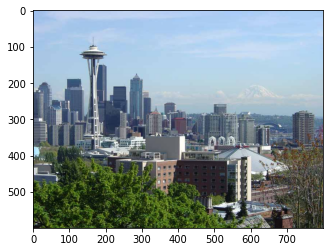

In [2]:
import os
import numpy as np
import scipy as sc
from scipy import ndimage
from skimage import filters
from matplotlib import pyplot as plt
# import seaborn as sns
from PIL import Image
# sns.set(context='poster')
from loguru import logger
%matplotlib inline

seattleImg = Image.open(os.getcwd() + '/hw1_data/Seattle.jpg')
print(type(seattleImg))
seattleImg = np.asarray(seattleImg)
print("Input img shape: ", seattleImg.shape)
plt.imshow(seattleImg)

In [10]:
def convolve1D(image, filter):
    image = np.asarray(image)
    filter_length = filter.shape[0]
    source_pix = 0
    print(source_pix)
    sum = 0

    # print(source_pix)
    print("Image shape: ", image.shape)

    for source_pix in range(source_pix, image.shape[0] - int(filter_length/2)*2):
        print("Source index: ", source_pix)
        for j in range(filter_length): 
            sum += filter[j] * image[source_pix + j]
            print(filter[j] , " ", image[source_pix + j], " ", sum)
        # print(sum / filter_length)
        center = source_pix + int(filter_length/2)
        print(center)
        image[center] = int(sum/filter_length)
        sum = 0

    # TODO Need to handle padding

    return image    

box_filter = np.ones((5,), dtype=float)
test_image = [1, 2, 3, 4, 5, 6, 7, 8, 9]

print(convolve1D(test_image, box_filter))

def convolve2D(image, filter):
    # image is type PIL Image
    # filter is a np.array object
    
    # Convert image into numpy array
    image = np.asarray(image)
    
    x = filter.shape[0] / 2
    y = filter.shape[1] / 2 # coordinates for the image pixel
    
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            sum = 0
            for c in range (filter.shape[0]):
                for r in range (filter.shape[1]):
                   sum += image[x][y] * filter[c][r]
            print(sum)
            image[x][y] = sum
    
    return image

# box_filter = np.ones((3,3), dtype=float)
# box_filter *= (1/9)

# print(box_filter)

# sample_img = np.ones((9,9), dtype=float)

# filtered = convolve(sample_img, box_filter)
# print(filtered)

0
Image shape:  (9,)
Source index:  0
1.0   1   1.0
1.0   2   3.0
1.0   3   6.0
1.0   4   10.0
1.0   5   15.0
2
Source index:  1
1.0   2   2.0
1.0   3   5.0
1.0   4   9.0
1.0   5   14.0
1.0   6   20.0
3
Source index:  2
1.0   3   3.0
1.0   4   7.0
1.0   5   12.0
1.0   6   18.0
1.0   7   25.0
4
Source index:  3
1.0   4   4.0
1.0   5   9.0
1.0   6   15.0
1.0   7   22.0
1.0   8   30.0
5
Source index:  4
1.0   5   5.0
1.0   6   11.0
1.0   7   18.0
1.0   8   26.0
1.0   9   35.0
6
[1 2 3 4 5 6 7 8 9]


## 1. 

<class 'PIL.JpegImagePlugin.JpegImageFile'>
Input img shape:  (600, 800, 3)


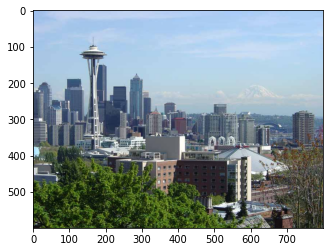

In [2]:
def GaussianBlurImage(image, sigma)->Image:
    filter_size = 2 * int(sigma * 4 + 0.5) + 1
    print(f'filter size: {filter_size}')
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)

    for i in range(filter_size):
        for j in range(filter_size):
            x = i - filter_size // 2
            y = j - filter_size // 2
            # print(x, y)
            gaussian_filter[i, j] = 1.0 / (2 * np.pi * sigma ** 2) * np.exp(-(x ** 2 + y ** 2)/(2 * sigma ** 2))
    
    print("Gaussian FIlter shape: ", gaussian_filter.shape)
    # plt.imshow(gaussian_filter)

    # ADD IMAGE PADDING
    # im_padded = np.pad(image, pad_width=((filter_size // 2, filter_size // 2), (filter_size // 2, filter_size // 2), (0, 0)), mode='constant', constant_values=0).astype(np.float32)
    # fig, (ax, ax_padded) = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
    # ax.imshow(image)
    # ax_padded.imshow(im_padded.astype(np.uint8))
    # plt.show()

    # PERFORM CONVOLUTION
    image_filtered = np.zeros_like(image, dtype=np.int8)
    for c in range(3): # 3 is chosen since the image is [x pix, y pix, n channels] where n = 3
        image_filtered[:, :, c] = sc.ndimage.convolve(image[:, :, c], gaussian_filter, mode='constant', cval=0.0)
        # print(image_filtered[:, :, c])

    image_filtered = np.clip(image_filtered, 0, 255).astype(np.int8)
    return image_filtered



filter size: 33
Gaussian FIlter shape:  (33, 33)
(600, 800, 3) <class 'numpy.ndarray'>


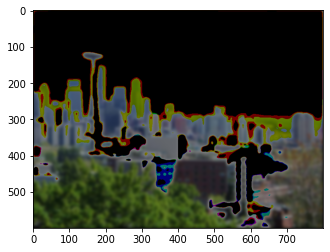

In [3]:
filtered_img = np.asarray(GaussianBlurImage(seattleImg, 4.0))
print(filtered_img.shape, type(filtered_img))
plt.imshow(filtered_img)